<div style="text-align:center;">

# <span style="font-size:40px; font-weight:700;">FEGLA-Toolkit</span>

<span style="font-size:28px; font-weight:600;">Article:</span>

## <span style="font-size:34px; font-style:italic;">FEGLA: A Python Toolkit for Rapid Estimation of Tsunami-Induced Flooded Areas</span>

### <span style="font-size:24px; font-weight:600;">Authors:</span>

<span style="font-size:20px;">
Francisco J. Sáez<sup>a</sup>,  
Rodrigo Cienfuegos<sup>b</sup>,  
Patricio A. Catalán<sup>c</sup>,  
Alejandro Urrutia<sup>a</sup>
</span>

### <span style="font-size:24px; font-weight:600;">Affiliations:</span>

<div style="font-size:16px; line-height:1.4;">
a. Centro de Investigación para la Gestión Integrada del Riesgo de Desastres (CIGIDEN), Santiago, Chile  
</div>
<div style="font-size:16px; line-height:1.4;">
b. Departamento de Ingeniería Hidráulica y Ambiental, Escuela de Ingeniería, Pontificia Universidad Católica de Chile, Santiago, Chile  
</div>
<div style="font-size:16px; line-height:1.4;">
c. Departamento de Obras Civiles, Universidad Técnica Federico Santa María, Valparaíso, Chile  
</div>

</div>

### <span style="font-size:20px; font-weight:600;">Corresponding Author:</span>

<div style="text-align:left; font-size:16px;">
Francisco J. Sáez — <a href="mailto:fjsaezr@gmail.com">fjsaezr@gmail.com</a><br>
ORCID: <a href="https://orcid.org/0000-0002-2529-8582">0000-0002-2529-8582</a><br>
LinkedIn: <a href="https://linkedin.com">https://www.linkedin.com/in/franciscosaezr/</a><br>
GitHub:<a href="https://github.com/">GitHub – FEGLA-Toolkit</a>
</div>


---

## **Overview**

This notebook implements the complete workflow of the **FEGLA Toolkit**, a Python-based framework designed to estimate tsunami-induced flooded areas rapidly and efficiently. The code automates model execution, post-processing, inundation polygon construction, and final export of flood maps and GIS-compatible layers (SHP/KMZ), making the entire hazard-mapping workflow easy to repeat and reproduce.

## **What FEGLA Does**

The **Forward Energy Grade Line Analysis (FEGLA)** method provides a simplified but physically grounded way to approximate tsunami inundation.  
Instead of solving the Nonlinear Shallow Water Equations, FEGLA:

- Uses a nonlinear energy-balance relation linking **shoreline flood depth (Hmax)** with **inundation distance and area**.  
- Computes water surface profiles along predefined transects using calibrated parameters (F₀, Fᵣ, roughness).  
- Builds an inundation polygon by connecting the outermost flooded points across all transects.  

Article: <a href="https://www.sciencedirect.com/science/article/abs/pii/S0378383924002217">Forward energy grade line analysis for tsunami inundation mapping</a>

## **What This Notebook Executes**

- Loads transect geometry, bathymetry, and calibrated FEGLA parameters.  
- Runs FEGLA for multiple user-defined **Hmax** scenarios.  
- Generates flooded-area polygons and computes their surface area.  
- Produces high-resolution inundation maps.
- Exports polygons to **KMZ** (Google Earth) and **SHP** (GIS software).  

This notebook serves as a practical template for applying FEGLA to any study site after defining the transects over topobathymetry in a certain location.

## Inputs

### Load packages

In [10]:
# Functions for applying FEGLA
from tsunamicore.postprocessing.nootebook_tools import (
    build_project_paths,
    load_transects,
    run_FEGLA,
    plot_flood_maps,
    save_all_flood_polygons
)

# To convert from UTM to WGS or WGS to UTM
from pyproj import Transformer
transformer_utm = Transformer.from_crs("epsg:4326", "epsg:32719", always_xy=True)
transformer_wgs = Transformer.from_crs("epsg:32719", "epsg:4326", always_xy=True)

#### **Parameters dictionary (params)**

The params dictionary contains all configuration settings required to run the FEGLA inundation model and produce the corresponding flooded-area maps.
- **city** - Name of the study area.
- **manning** - Manning roughness coefficient used in flow dissipation along transects.
- **bestmodel** - Selected Froude parameterization: constant, squared or linear (**FBCP**).
- **bestF0** - Calibrated base Froude parameter (shoreline Froude number).
- **bestFR** - Calibrated base Froude parameter (inland Froude number at the inundation limit, only for linear decay).
- **hmax** - List of shoreline water-level scenarios (in meters) to evaluate.

**Froude-Based Calibration Parameter (FBCP)**

The FEGLA method allows three options for how the Froude number varies inland.  
These are implemented using the following mathematical expressions:

FBCP = 
\begin{cases}
F_i = F_0, & \text{(constant)} \\[10pt]
F_i = F_0 \left( 1 - \dfrac{x_i}{X_R} \right)^{1/2}, & \text{(square-root decay)} \\[12pt]
F_i = F_0 + (F_R - F_0)\dfrac{x_i}{X_R}, & \text{(linear decay)}
\end{cases}

**Where:**  
- \( F_0 \): shoreline Froude number  
- \( F_R \): inland Froude number at the inundation limit  
- \( x_i \): distance along the transect  
- \( X_R \): total inundation distance  



In [11]:
params = {
    'city'       : 'Arica',
    'manning'    : 0.04, 
    'bestmodel'  : 'linear',
    'bestF0'     : 0.5,
    'bestFR'     : 0.4,
    'hmax'       : [0.5, 1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

In [3]:
# Dictionary to store all necessary path
paths        = build_project_paths(params["city"])

# Loading transect data
transectData = load_transects(paths["transect_path"])

Loading transects...
Loaded 92 transects.


## Run Model

In [4]:
# Running FEGLA for params 
results, errors = run_FEGLA(transectData,
                            params,
                            paths['production_path'])


Running FEGLA for city: Arica
Mode: linear,  F0=0.5,  FR=0.4
Testing 12 hmax scenarios: [0.5, 1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
Number of transects: 92


 Running FEGLA for hmax = 0.500 m



hmax = 0.50 m: 100%|██████████| 92/92 [00:00<00:00, 685.97it/s]


90 out of 92 transects (97.8%) converged below 0.01 m.
2 transects did not converge.
Non-converged errors range: 0.010 → 0.010 m

Saved FEGLA results for hmax=0.50 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_0.50m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 1.000 m



hmax = 1.00 m: 100%|██████████| 92/92 [00:00<00:00, 930.80it/s]


91 out of 92 transects (98.9%) converged below 0.01 m.
1 transects did not converge.
Non-converged errors range: 0.010 → 0.010 m

Saved FEGLA results for hmax=1.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_1.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 2.000 m



hmax = 2.00 m: 100%|██████████| 92/92 [00:00<00:00, 520.66it/s]


91 out of 92 transects (98.9%) converged below 0.01 m.
1 transects did not converge.
Non-converged errors range: 0.010 → 0.010 m

Saved FEGLA results for hmax=2.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_2.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 4.000 m



hmax = 4.00 m: 100%|██████████| 92/92 [00:00<00:00, 275.86it/s]


87 out of 92 transects (94.6%) converged below 0.01 m.
5 transects did not converge.
Non-converged errors range: 0.010 → 0.010 m

Saved FEGLA results for hmax=4.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_4.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 6.000 m



hmax = 6.00 m: 100%|██████████| 92/92 [00:00<00:00, 155.60it/s]


86 out of 92 transects (93.5%) converged below 0.01 m.
6 transects did not converge.
Non-converged errors range: 0.010 → 0.010 m

Saved FEGLA results for hmax=6.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_6.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 8.000 m



hmax = 8.00 m: 100%|██████████| 92/92 [00:00<00:00, 105.99it/s]


89 out of 92 transects (96.7%) converged below 0.01 m.
3 transects did not converge.
Non-converged errors range: 0.010 → 0.010 m

Saved FEGLA results for hmax=8.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_8.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 10.000 m



hmax = 10.00 m: 100%|██████████| 92/92 [00:01<00:00, 79.64it/s] 


90 out of 92 transects (97.8%) converged below 0.01 m.
2 transects did not converge.
Non-converged errors range: 0.010 → 0.087 m

Saved FEGLA results for hmax=10.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_10.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 12.000 m



hmax = 12.00 m: 100%|██████████| 92/92 [00:01<00:00, 49.85it/s]


82 out of 92 transects (89.1%) converged below 0.01 m.
10 transects did not converge.
Non-converged errors range: 0.010 → 0.393 m

Saved FEGLA results for hmax=12.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_12.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 14.000 m



hmax = 14.00 m: 100%|██████████| 92/92 [00:02<00:00, 42.09it/s]


84 out of 92 transects (91.3%) converged below 0.01 m.
8 transects did not converge.
Non-converged errors range: 0.010 → 0.480 m

Saved FEGLA results for hmax=14.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_14.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 16.000 m



hmax = 16.00 m: 100%|██████████| 92/92 [00:02<00:00, 37.56it/s]


82 out of 92 transects (89.1%) converged below 0.01 m.
10 transects did not converge.
Non-converged errors range: 0.010 → 0.572 m

Saved FEGLA results for hmax=16.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_16.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 18.000 m



hmax = 18.00 m: 100%|██████████| 92/92 [00:02<00:00, 36.37it/s]


85 out of 92 transects (92.4%) converged below 0.01 m.
7 transects did not converge.
Non-converged errors range: 0.010 → 0.619 m

Saved FEGLA results for hmax=18.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_18.00m_linear_F0_0.5_FR_0.4.pkl


 Running FEGLA for hmax = 20.000 m



hmax = 20.00 m: 100%|██████████| 92/92 [00:02<00:00, 36.12it/s]

84 out of 92 transects (91.3%) converged below 0.01 m.
8 transects did not converge.
Non-converged errors range: 0.010 → 0.657 m

Saved FEGLA results for hmax=20.00 m:
 → /Users/fjsaez/Documents/GitHub/FEGLA-Toolkit/outputs/Arica/production/Arica_hmax_20.00m_linear_F0_0.5_FR_0.4.pkl



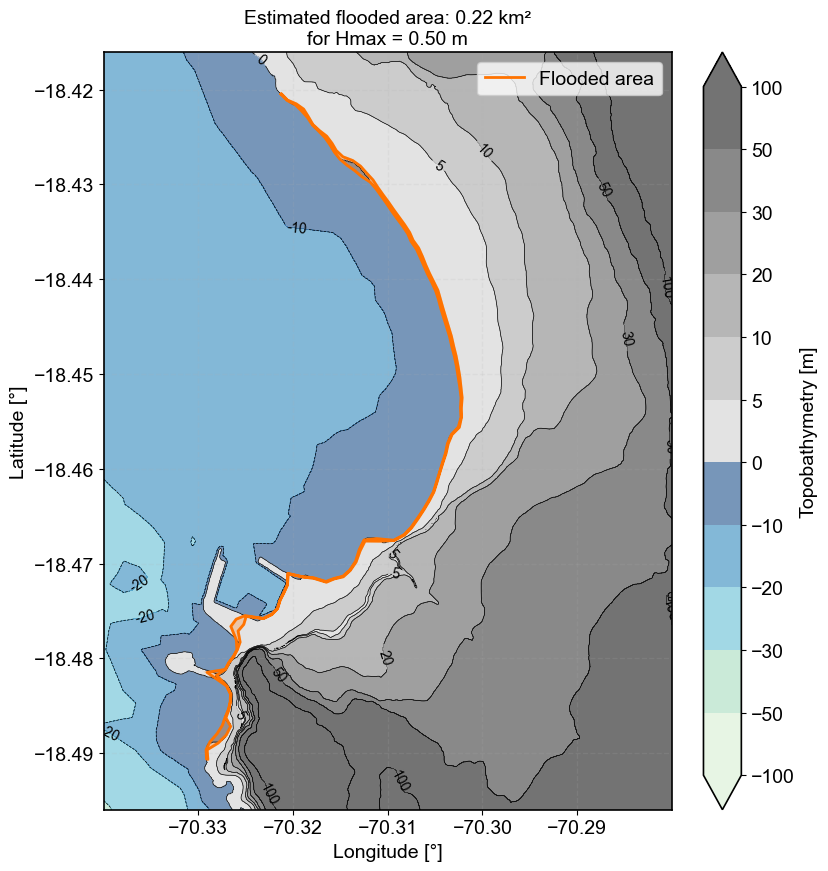

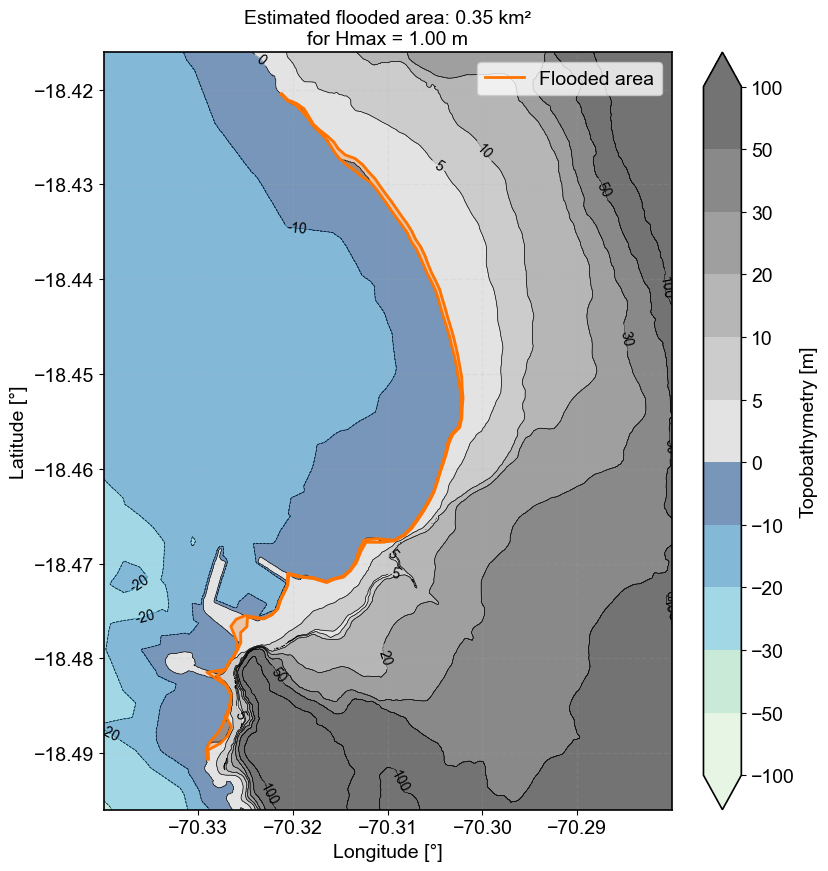

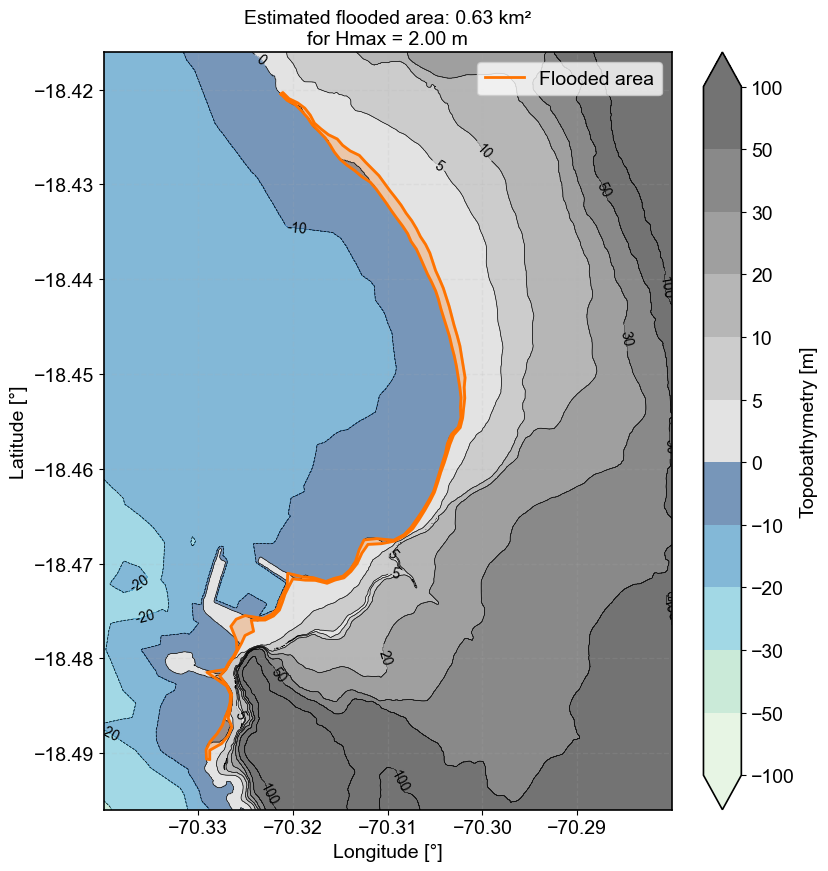

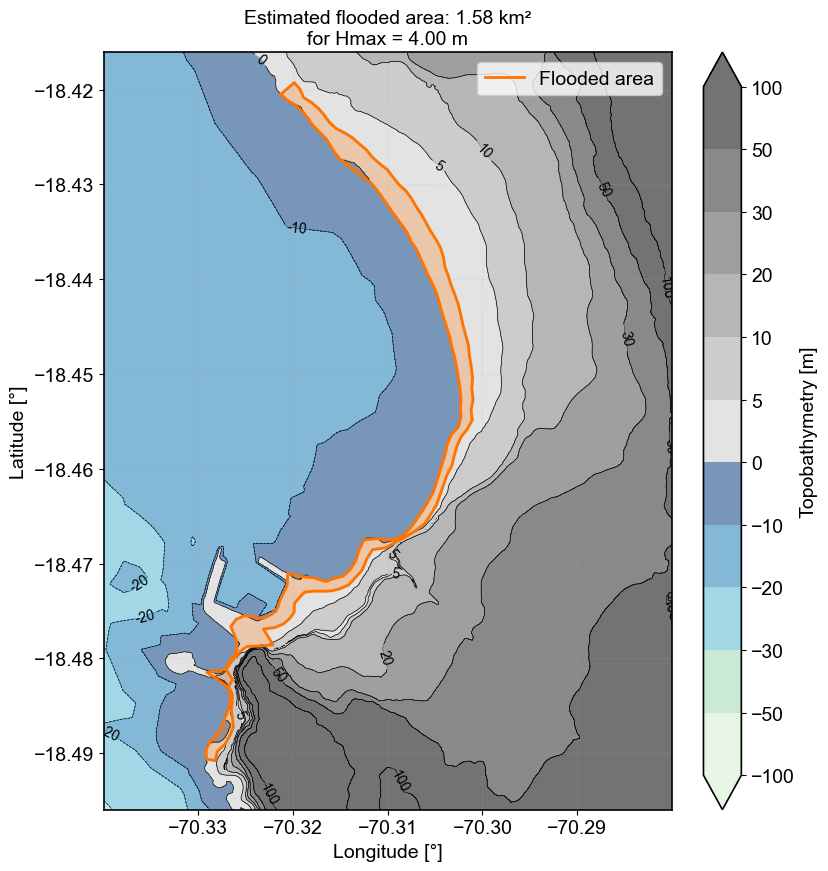

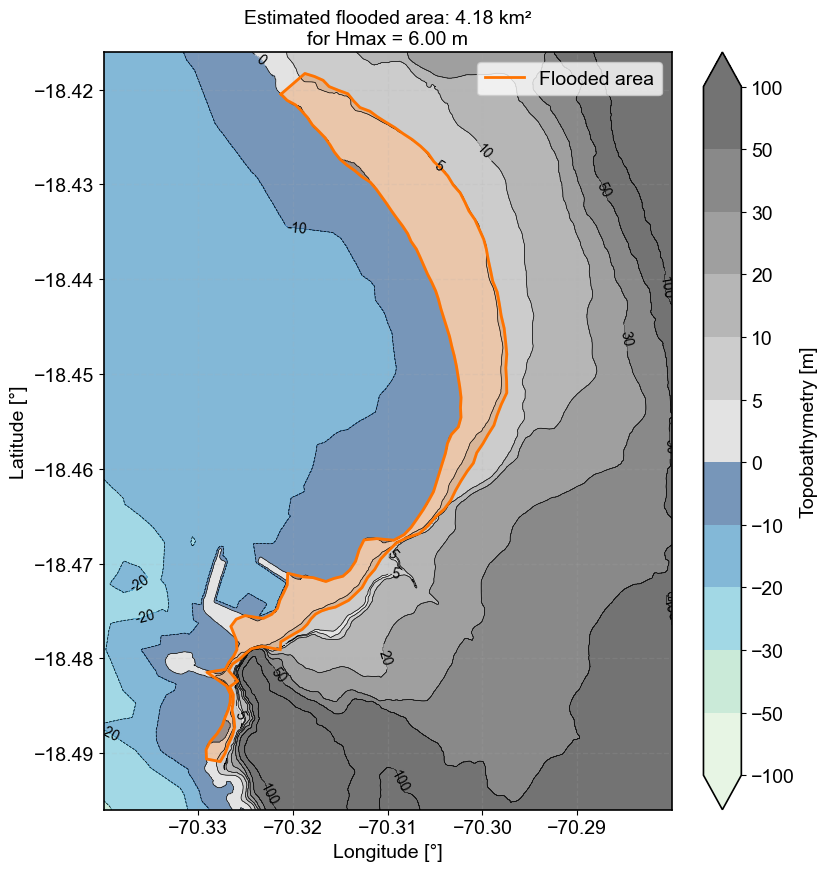

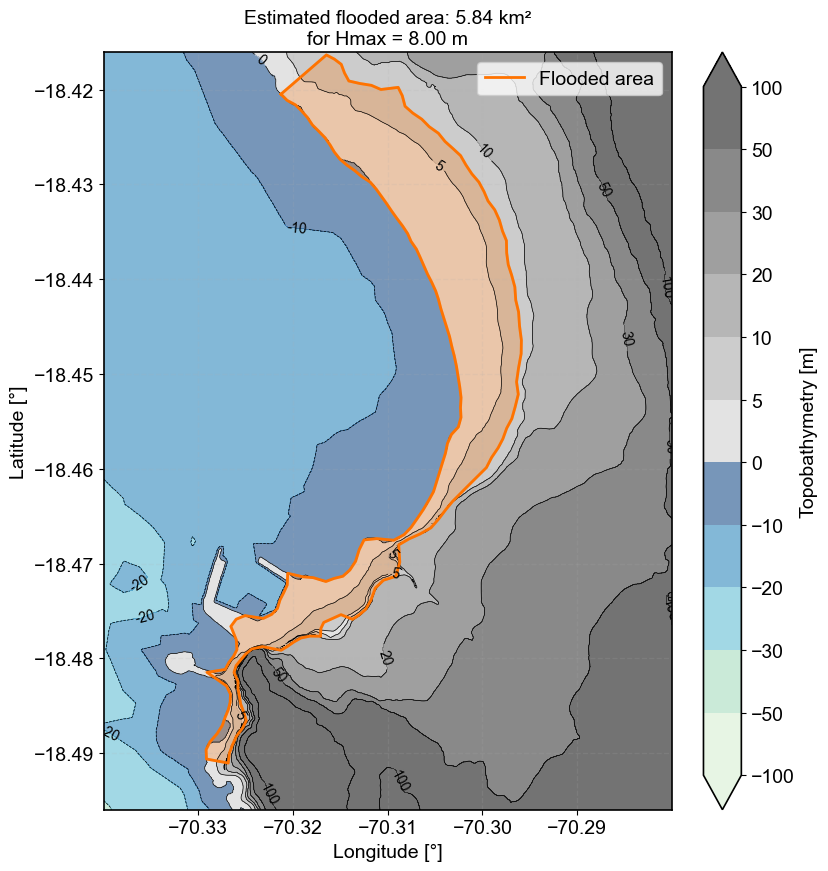

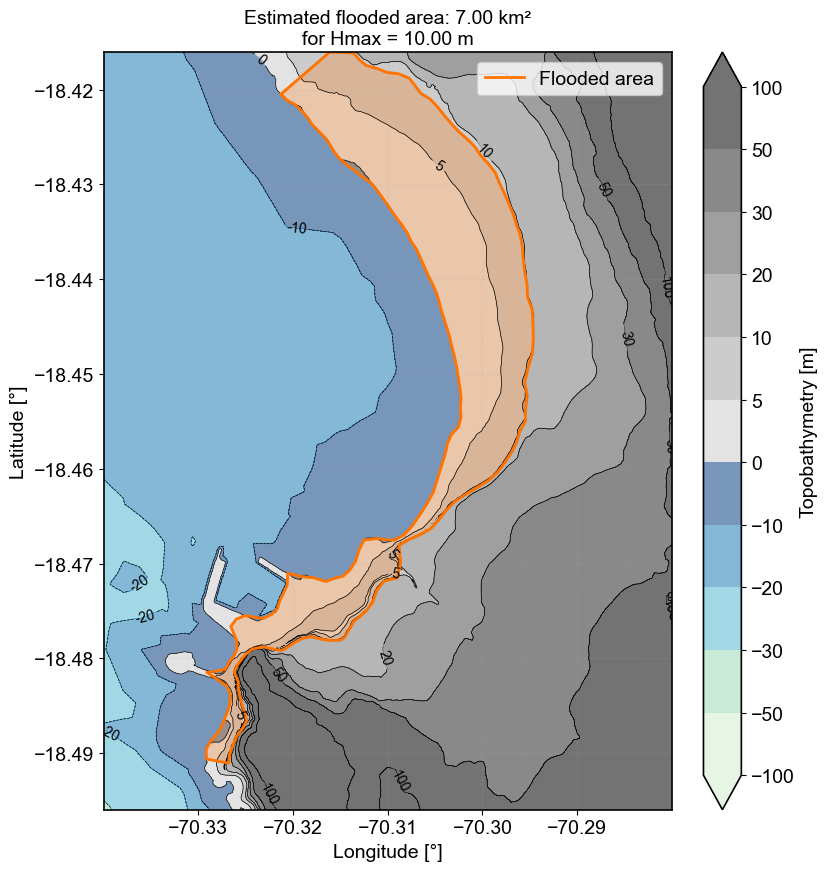

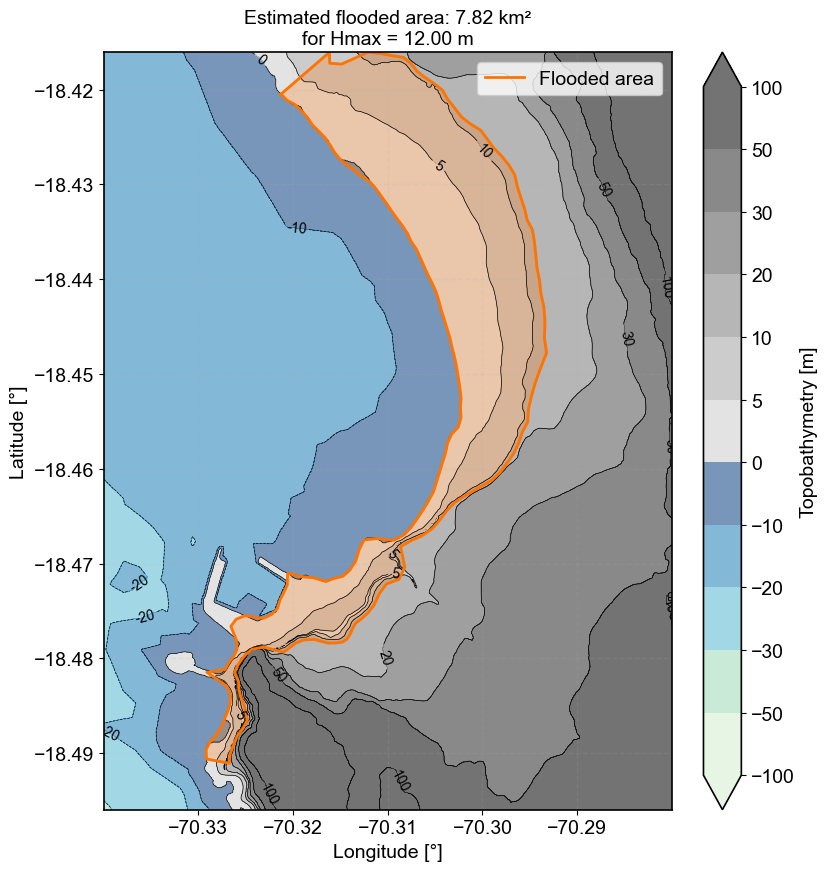

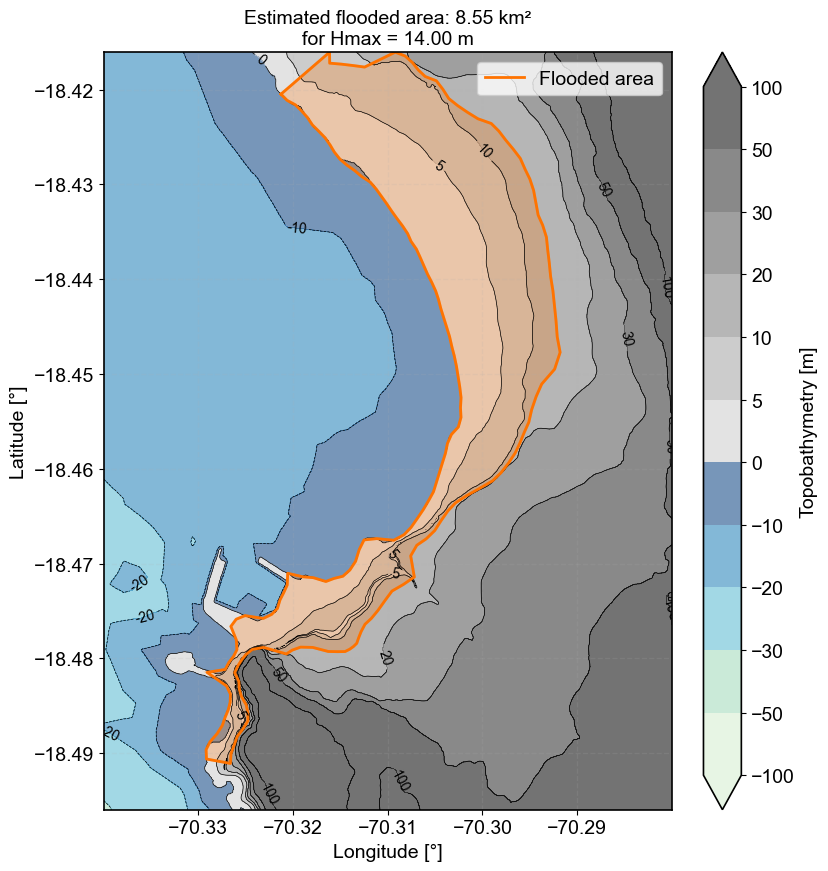

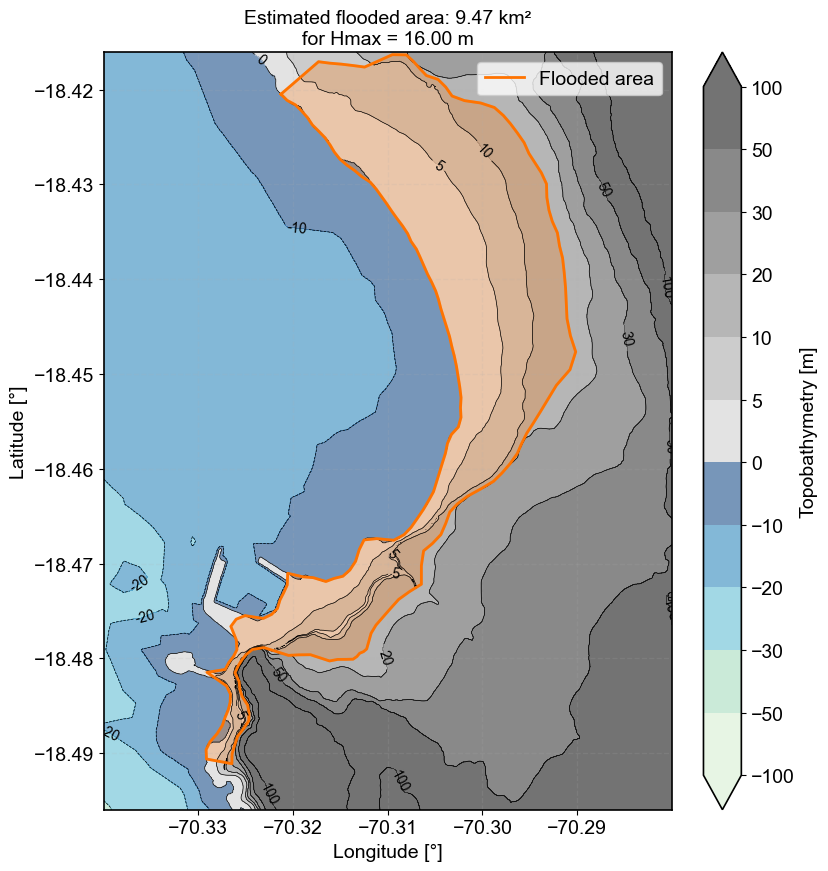

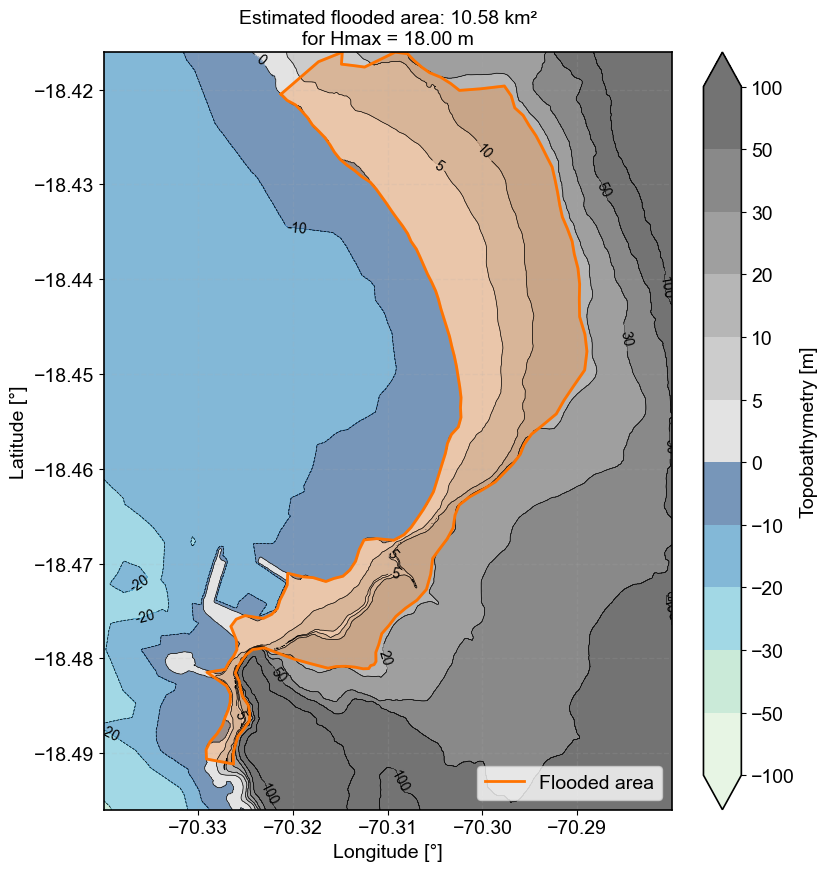

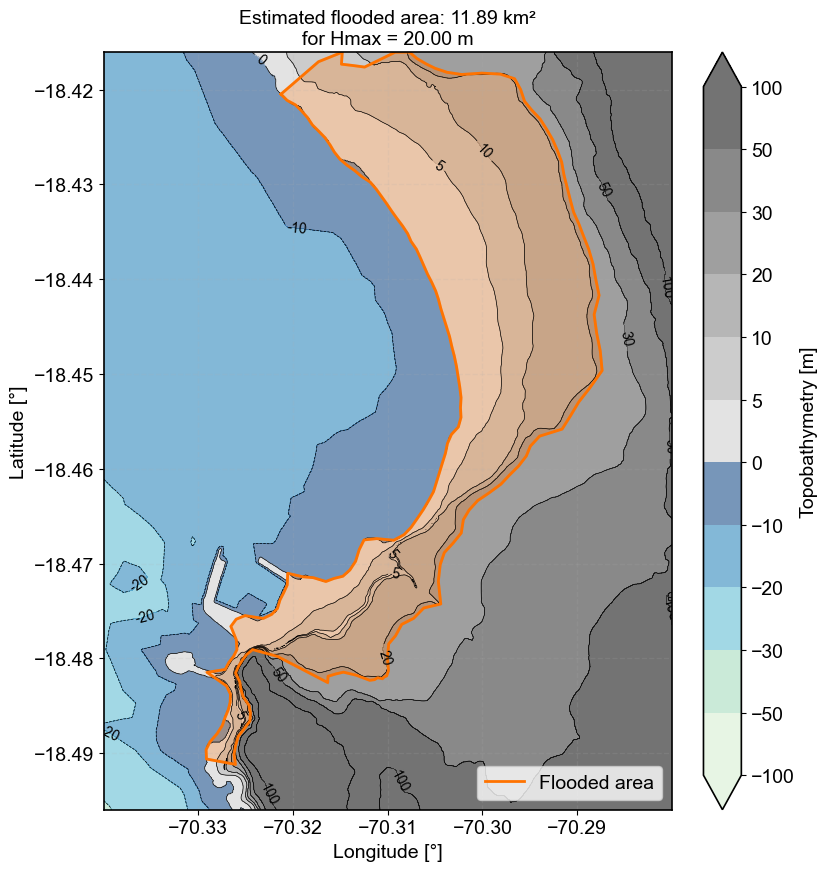

In [7]:
# Plotting results
polygons, areas = plot_flood_maps(
    city            = params["city"],
    data_path       = paths['data_path'],
    transectData    = transectData,
    results_all     = results,
    transformer_wgs = transformer_wgs,
    production_path = paths['production_path']
)

In [8]:
# Save results as shp and/or kmz
save_all_flood_polygons(city            = params["city"],
                        polygons        = polygons,
                        production_path = paths['production_path'],
                        fmt             = ("kmz","shp"),   # or only "kmz" / only "shp"
                        source_crs      = "EPSG:32719",  # your UTM zone
                        target_crs      = "EPSG:4326",   # GPS longitude/latitude
                        color           = "#ff7300"
)


Saving flood polygons...



Saving flooded areas: 100%|██████████| 12/12 [00:00<00:00, 225.01it/s]


All flood polygons exported successfully!

